In [1]:
import pandas as pd

df = pd.read_csv('fraud_data.csv')
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [2]:
# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].nunique() for col in categorical_columns}

# Display data types of all columns
data_types = df.dtypes
data_types

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                  object
dtype: object

In [3]:
categorical_columns

Index(['trans_date_trans_time', 'merchant', 'category', 'city', 'state', 'job',
       'dob', 'trans_num', 'is_fraud'],
      dtype='object')

In [4]:
unique_values

{'trans_date_trans_time': 12126,
 'merchant': 693,
 'category': 14,
 'city': 176,
 'state': 13,
 'job': 163,
 'dob': 187,
 'trans_num': 14383,
 'is_fraud': 4}

In [5]:
# Distribution of the target variable 'is_fraud'
fraud_distribution = df['is_fraud'].value_counts(normalize=True)
fraud_distribution

0                         0.872214
1                         0.127648
1"2020-12-24 16:56:24"    0.000069
0"2019-01-01 00:00:44"    0.000069
Name: is_fraud, dtype: float64

In [6]:
row_count, column_count = df.shape

row_count, column_count

(14446, 15)

In [7]:
# Identify rows with misformatted is_fraud values
incorrect_rows = df[df['is_fraud'].str.contains('"')]

# Correct the misformatted is_fraud values
df['is_fraud'] = df['is_fraud'].str.extract(r'(\d)').astype(int)

# Verify the correction
df['is_fraud'].value_counts(normalize=True)


0    0.872283
1    0.127717
Name: is_fraud, dtype: float64

In [8]:
# Convert 'trans_date_trans_time' to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

# Create new columns for date, time, and hour
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Display the first few rows to verify
df[['trans_date', 'trans_time', 'trans_hour']].head()

,trans_date,trans_time,trans_hour
0,2019-01-04,00:58:00,0
1,2019-01-04,15:06:00,15
2,2019-01-04,22:37:00,22
3,2019-01-04,23:06:00,23
4,2019-01-04,23:59:00,23


In [9]:
from datetime import datetime

# Convert 'dob' to datetime format
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')

# Calculate age
current_year = datetime.now().year
df['age'] = current_year - df['dob'].dt.year

# Display the first few rows to verify
df[['dob', 'age']].head()


,dob,age
0,1939-11-09,85
1,1939-11-09,85
2,1939-11-09,85
3,1939-11-09,85
4,1939-11-09,85


In [10]:
import numpy as np

# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# Calculate distance and add as a new column
df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

# Display the first few rows to verify
df[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()


,lat,long,merch_lat,merch_long,distance
0,64.7556,-165.6723,65.654142,-164.722603,109.285552
1,64.7556,-165.6723,65.468863,-165.473127,79.856896
2,64.7556,-165.6723,65.347667,-165.914542,66.807915
3,64.7556,-165.6723,64.445035,-166.080207,39.636227
4,64.7556,-165.6723,65.447094,-165.446843,77.611529


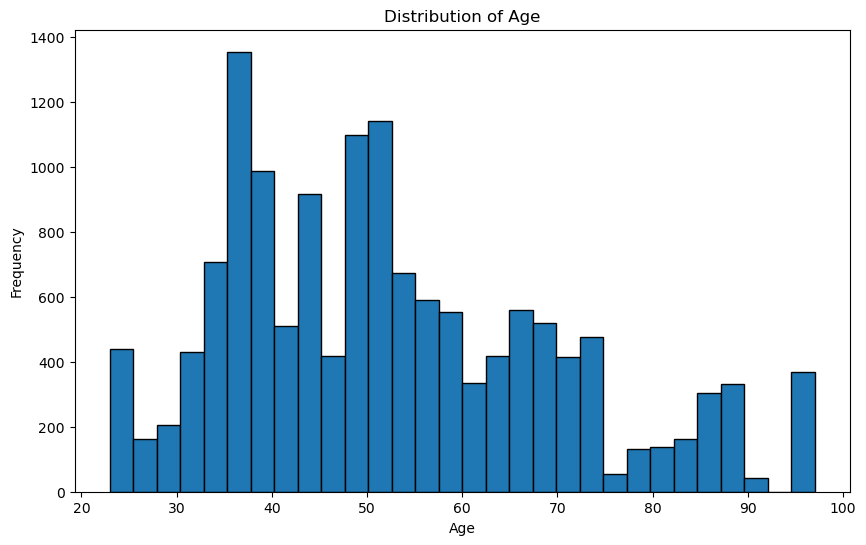

In [11]:
import matplotlib.pyplot as plt

# Plot the distribution of age
plt.figure(figsize=(10, 6))
df['age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\biond\AppData\Local\Temp\ipykernel_18984\2529729797.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


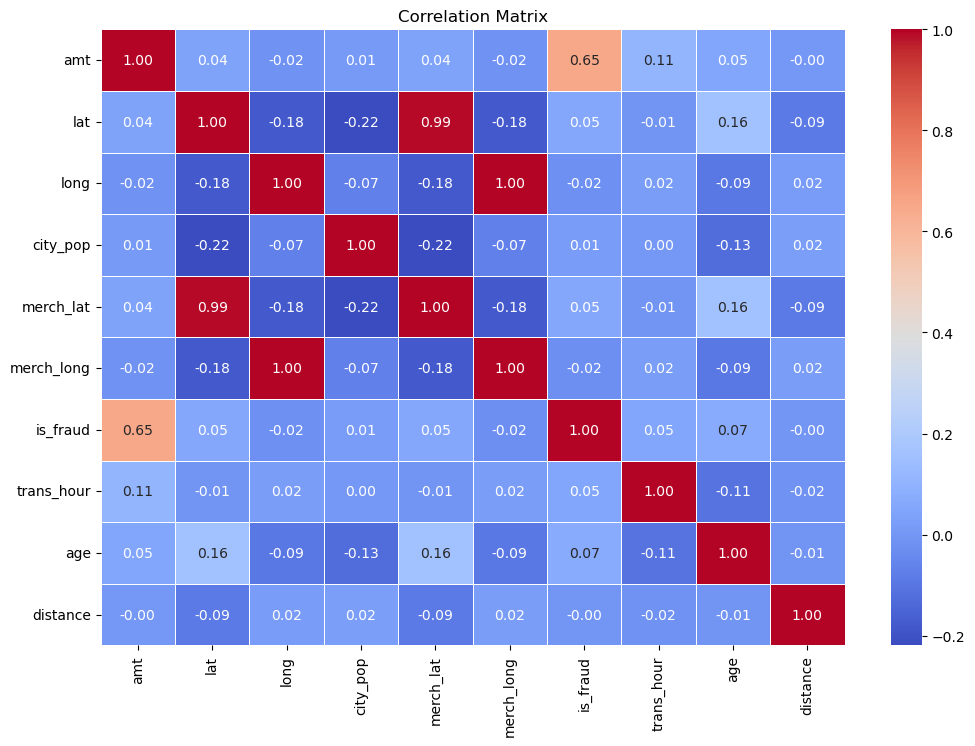

In [12]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


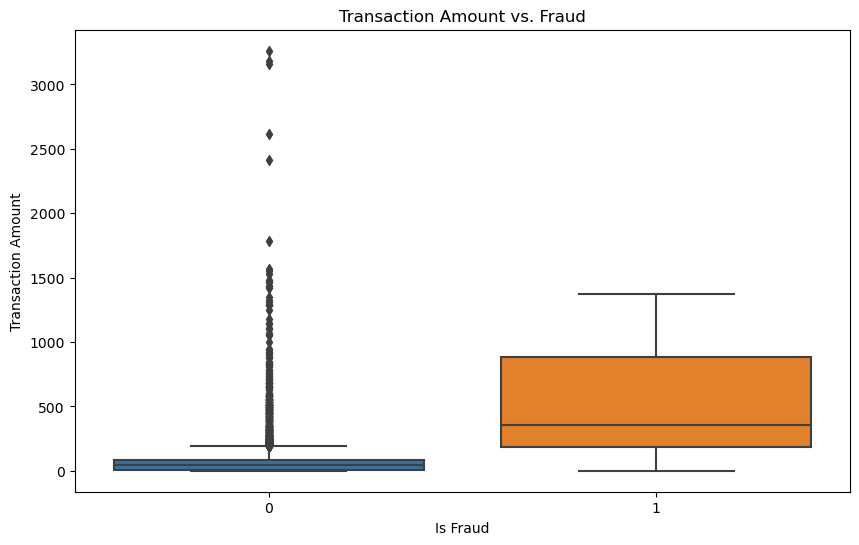

In [13]:
# Boxplot to compare transaction amounts for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()


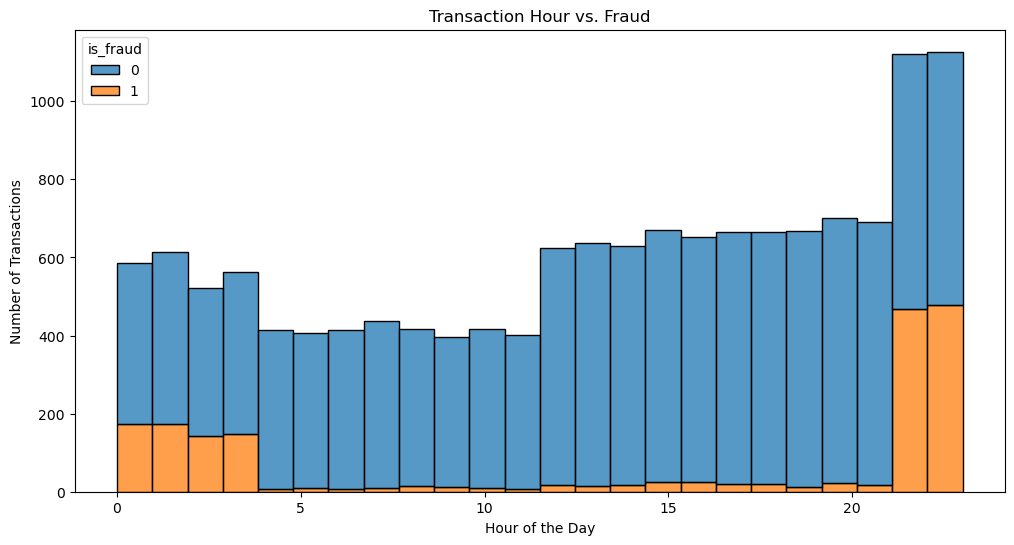

In [14]:
# Plot the distribution of transaction hours for fraudulent and non-fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour vs. Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()


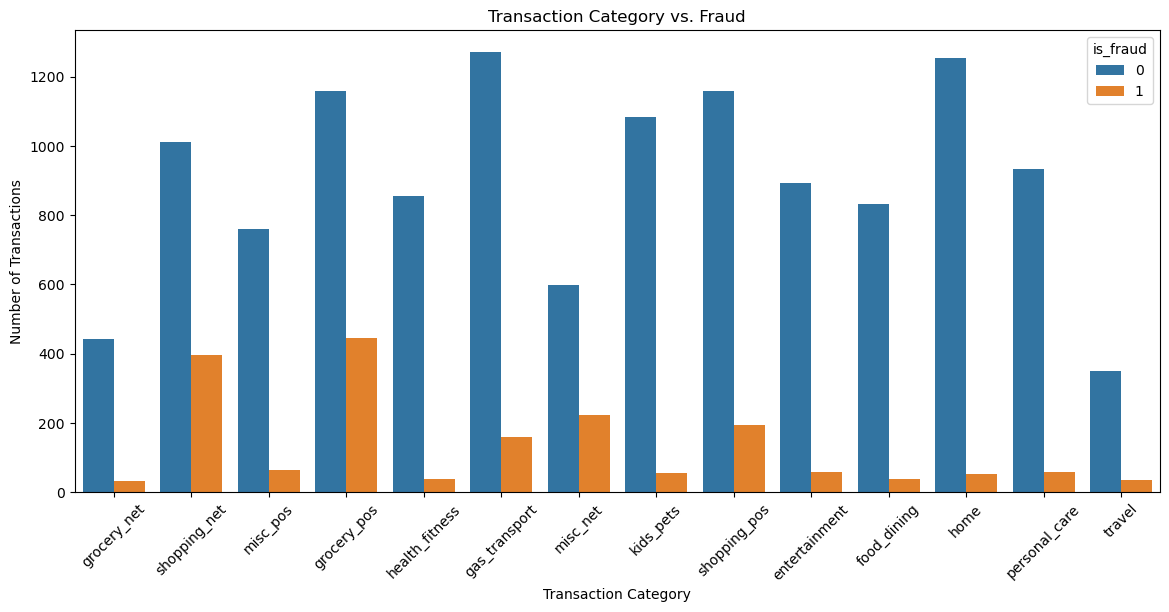

In [15]:
# Bar plot to compare the proportion of fraudulent transactions across different categories
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='category', hue='is_fraud')
plt.title('Transaction Category vs. Fraud')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


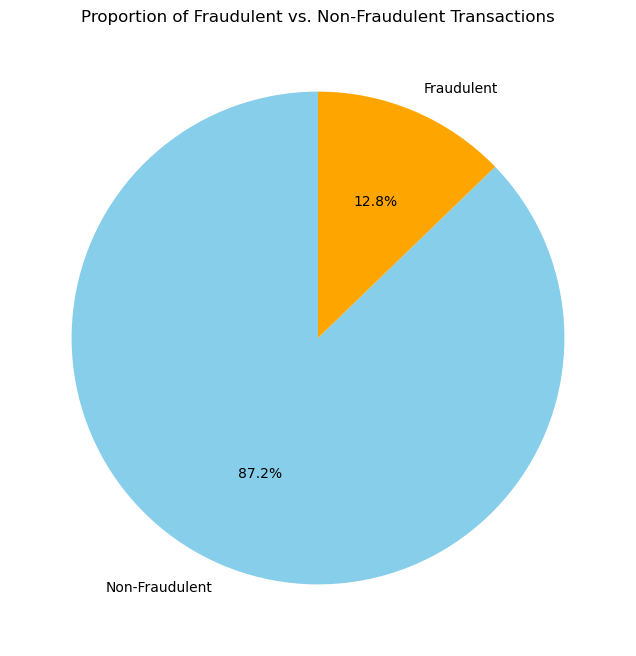

In [16]:
# Plotting a pie chart to show the proportion of fraudulent and non-fraudulent transactions
fraud_counts = df['is_fraud'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Proportion of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()


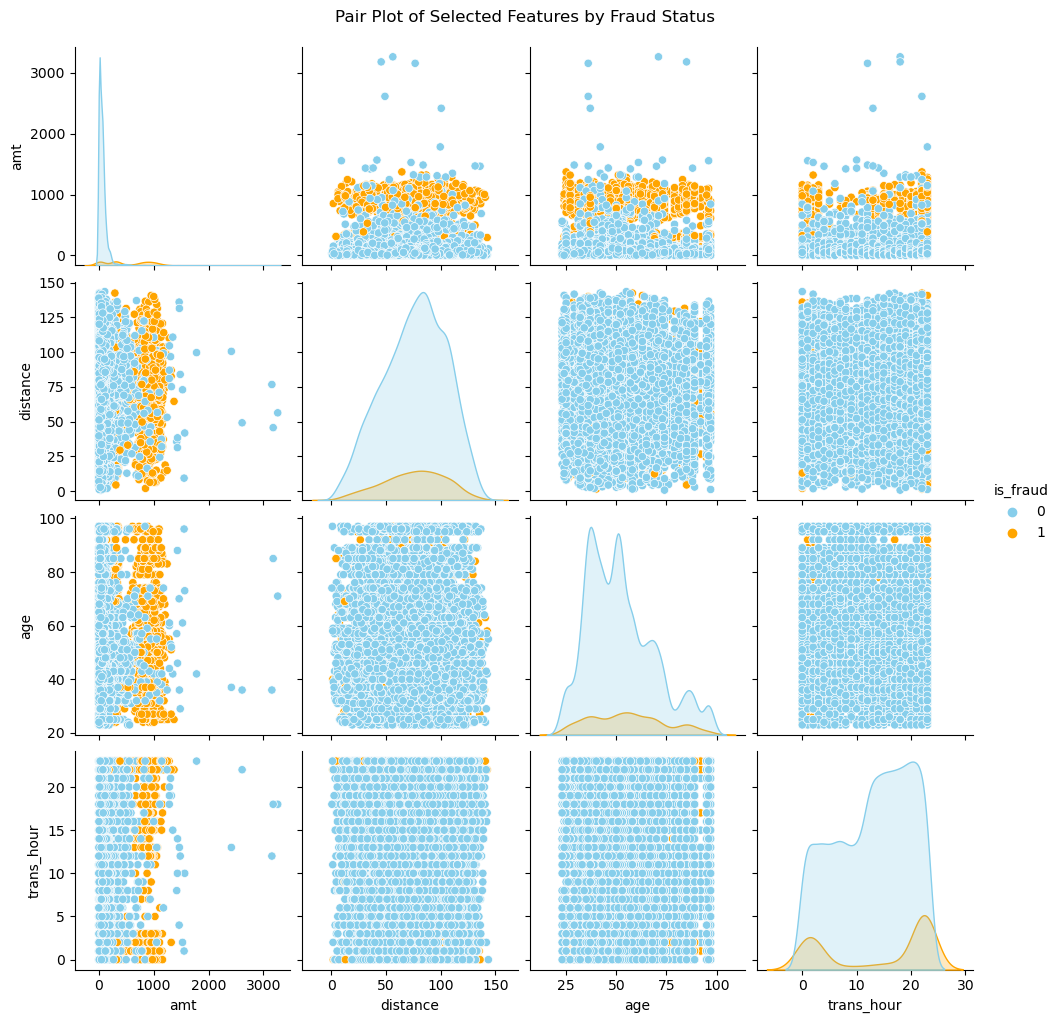

In [17]:
import seaborn as sns

# Select the features for the pair plot
pairplot_features = ['amt', 'distance', 'age', 'trans_hour', 'is_fraud']

# Create the pair plot
sns.pairplot(df[pairplot_features], hue='is_fraud', palette={0: 'skyblue', 1: 'orange'}, diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features by Fraud Status', y=1.02)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

# Define the feature matrix (X) and target variable (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((11556, 19), (2890, 19), (11556,), (2890,))

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Drop non-numeric columns that are not useful for the model
X_cleaned = X.select_dtypes(include=[float, int])

# Re-split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on the cleaned training data
rf_model.fit(X_train_cleaned, y_train)

# Make predictions on the cleaned test set
y_pred_cleaned = rf_model.predict(X_test_cleaned)

# Evaluate the model with the cleaned data
conf_matrix_cleaned = confusion_matrix(y_test, y_pred_cleaned)
class_report_cleaned = classification_report(y_test, y_pred_cleaned)

# Print the evaluation results
print("Confusion Matrix:")
print(conf_matrix_cleaned)

print("\nClassification Report:")
print(class_report_cleaned)



Confusion Matrix:
[[2480   25]
 [  68  317]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2505
           1       0.93      0.82      0.87       385

    accuracy                           0.97      2890
   macro avg       0.95      0.91      0.93      2890
weighted avg       0.97      0.97      0.97      2890



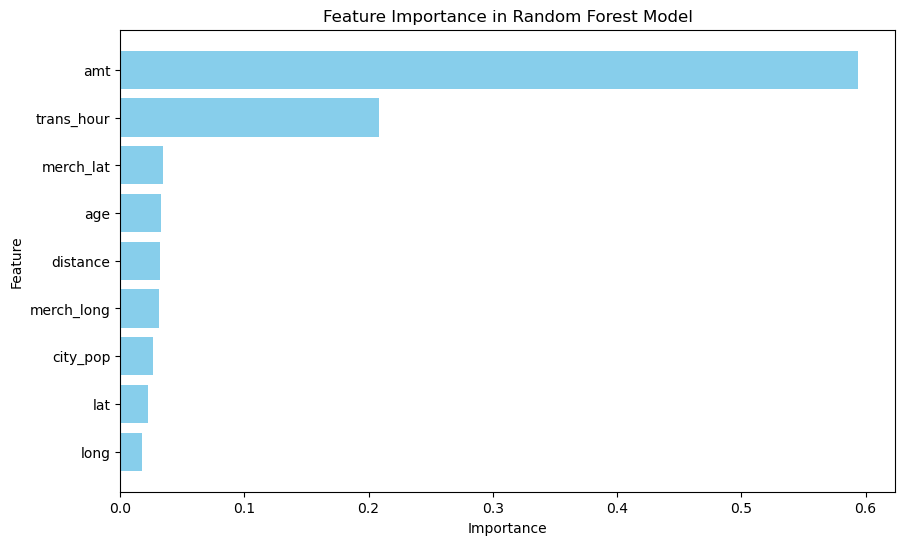

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_cleaned.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()
